## NAME- HIBAH MOHAMMED GHOUSE
## Z-ID- Z1945894

Assignment 3- APPLIED MACHINE LEARNING

## Predict who would be interested in buying a Caravan Insurance Policy

## 1. Which features are relevant for the prediction task? Select top 10 features based on your understanding. Show visualizations or statistics to support your selection.

In [ ]:
!pip install imbalanced-learn

In [ ]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import ggplot, aes, geom_boxplot, geom_bar, geom_point

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeClassifier


In [ ]:
training_url = "http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt"
testing_url = "http://kdd.ics.uci.edu/databases/tic/ticeval2000.txt"
target_url = "http://kdd.ics.uci.edu/databases/tic/tictgts2000.txt"

column_names = ['Customer_Subtype',
 'Number_of_houses',
 'Avg_size_household',
 'Avg_age',
 'Customer_main_type',
 'Roman_catholic',
 'Protestant',
 'Other_religion',
 'No_religion',
 'Married',
 'Living_together',
 'Other_relation',
 'Singles',
 'Household_without_children',
 'Household_with_children',
 'High_level_education',
 'Medium_level_education',
 'Lower_level_education',
 'High_status',
 'Entrepreneur',
 'Farmer',
 'Middle_management',
 'Skilled_labourers',
 'Unskilled_labourers',
 'Social_class_A',
 'Social_class_B1',
 'Social_class_B2',
 'Social_class_C',
 'Social_class_D',
 'Rented_house',
 'Home_owners',
 '1_car',
 '2_cars',
 'No_car',
 'National_Health_Service',
 'Private_health_insurance',
 'Income_<_30000',
 'Income_30-45000',
 'Income_45-75000',
 'Income_75-122000',
 'Income_>123000',
 'Average_income',
 'Purchasing_power_class',
 'Contribution_private_third_party_insurance',
 'Contribution_third_party_insurance_firms',
 'Contribution_third_party_insurane_agriculture',
 'Contribution_car_policies',
 'Contribution_delivery_van_policies',
 'Contribution_motorcycle-scooter_policies',
 'Contribution_lorry_policies',
 'Contribution_trailer_policies',
 'Contribution_tractor_policies',
 'Contribution_agricultural_machines_policies',
 'Contribution_moped_policies',
 'Contribution_life_insurances',
 'Contribution_private_accident_insurance_policies',
 'Contribution_family_accidents_insurance_policies',
 'Contribution_disability_insurance_policies',
 'Contribution_fire_policies',
 'Contribution_surfboard_policies',
 'Contribution_boat_policies',
 'Contribution_bicycle_policies',
 'Contribution_property_insurance_policies',
 'Contribution_social_security_insurance_policies',
 'Number_of_private_third_party_insurance_1-12',
 'Number_of_third_party_insurance_firms',
 'Number_of_third_party_insurance_agriculture',
 'Number_of_car_policies',
 'Number_of_delivery_van_policies',
 'Number_of_motorcycle-scooter_policies',
 'Number_of_lorry_policies',
 'Number_of_trailer_policies',
 'Number_of_tractor_policies',
 'Number_of_agricultural_machines_policies',
 'Number_of_moped_policies',
 'Number_of_life_insurances',
 'Number_of_private_accident_insurance_policies',
 'Number_of_family_accidents_insurance_policies',
 'Number_of_disability_insurance_policies',
 'Number_of_fire_policies',
 'Number_of_surfboard_policies',
 'Number_of_boat_policies',
 'Number_of_bicycle_policies',
 'Number_of_property_insurance_policies',
 'Number_of_social_security_insurance_policies',
 'Number_of_mobile_home_policies_0-1']

target_column_name = 'Number_of_mobile_home_policies_0-1'
training = pd.read_csv(training_url, names=column_names, sep='\t')
test_X = pd.read_csv(testing_url, names=column_names[0:85], sep='\t')
test_y = pd.read_csv(target_url, names = [target_column_name], sep='\t')


train_y = training[target_column_name]
train_X = training.drop(target_column_name, axis=1)
training.head()

,Customer_Subtype,Number_of_houses,Avg_size_household,Avg_age,Customer_main_type,Roman_catholic,Protestant,Other_religion,No_religion,Married,...,Number_of_private_accident_insurance_policies,Number_of_family_accidents_insurance_policies,Number_of_disability_insurance_policies,Number_of_fire_policies,Number_of_surfboard_policies,Number_of_boat_policies,Number_of_bicycle_policies,Number_of_property_insurance_policies,Number_of_social_security_insurance_policies,Number_of_mobile_home_policies_0-1
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
training.shape

(5822, 86)

In [ ]:
test_y.shape

(4000, 1)

In [ ]:
test_y.value_counts() #highly imbalanced data

Number_of_mobile_home_policies_0-1
0                                     3762
1                                      238
dtype: int64

In [ ]:
training.isnull().sum(axis=0) #no null values in the dataset

Customer_Subtype                                0
Number_of_houses                                0
Avg_size_household                              0
Avg_age                                         0
Customer_main_type                              0
                                               ..
Number_of_boat_policies                         0
Number_of_bicycle_policies                      0
Number_of_property_insurance_policies           0
Number_of_social_security_insurance_policies    0
Number_of_mobile_home_policies_0-1              0
Length: 86, dtype: int64

In [ ]:
training.describe() # getting the most effected ones in this data

,Customer_Subtype,Number_of_houses,Avg_size_household,Avg_age,Customer_main_type,Roman_catholic,Protestant,Other_religion,No_religion,Married,...,Number_of_private_accident_insurance_policies,Number_of_family_accidents_insurance_policies,Number_of_disability_insurance_policies,Number_of_fire_policies,Number_of_surfboard_policies,Number_of_boat_policies,Number_of_bicycle_policies,Number_of_property_insurance_policies,Number_of_social_security_insurance_policies,Number_of_mobile_home_policies_0-1
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


Considering some features from the above statistics-

Mean for customer subtype is approximately 25% 

Avg size household is 2.6%

Number_of_private_third_party_insurance_1-12 is 40%

Number of fire policies is 57%

In [ ]:
corr_data = training.corr()
corr_data

,Customer_Subtype,Number_of_houses,Avg_size_household,Avg_age,Customer_main_type,Roman_catholic,Protestant,Other_religion,No_religion,Married,...,Number_of_private_accident_insurance_policies,Number_of_family_accidents_insurance_policies,Number_of_disability_insurance_policies,Number_of_fire_policies,Number_of_surfboard_policies,Number_of_boat_policies,Number_of_bicycle_policies,Number_of_property_insurance_policies,Number_of_social_security_insurance_policies,Number_of_mobile_home_policies_0-1
Customer_Subtype,1.000000,-0.038721,-0.021997,0.009454,0.992672,-0.193613,0.090399,-0.025642,-0.019505,-0.065596,...,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718,-0.069385
Number_of_houses,-0.038721,1.000000,0.010102,0.056975,-0.045817,-0.006136,-0.024360,0.012056,0.020540,0.023025,...,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166,-0.009809
Avg_size_household,-0.021997,0.010102,1.000000,-0.328257,0.016115,0.013105,0.049356,-0.108650,-0.005527,0.534798,...,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384,0.035573
Avg_age,0.009454,0.056975,-0.328257,1.000000,0.003872,-0.037519,0.093654,0.057737,-0.119966,-0.040384,...,0.021070,-0.001747,0.000644,0.024417,0.000244,-0.001791,0.020612,-0.020042,-0.014540,0.004491
Customer_main_type,0.992672,-0.045817,0.016115,0.003872,1.000000,-0.199186,0.098493,-0.034566,-0.021466,-0.026619,...,0.023976,-0.010004,-0.002243,-0.012372,0.007099,-0.020683,-0.017990,-0.020997,-0.051723,-0.069300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Number_of_boat_policies,-0.018162,0.000666,0.000644,-0.001791,-0.020683,0.011795,0.018468,0.009417,-0.026407,-0.001566,...,0.023526,-0.005970,-0.004413,0.000177,0.091052,1.000000,-0.011093,0.040094,0.026325,0.105700
Number_of_bicycle_policies,-0.015774,-0.020993,0.030330,0.020612,-0.017990,-0.001503,0.001906,0.025661,-0.011122,0.020921,...,-0.011020,0.038345,-0.009025,-0.031095,-0.003420,-0.011093,1.000000,0.004845,0.009246,0.034144
Number_of_property_insurance_policies,-0.021087,0.018304,0.025907,-0.020042,-0.020997,-0.011431,0.002392,-0.009734,0.007261,-0.003420,...,-0.006391,0.016501,-0.005234,0.026274,0.081689,0.040094,0.004845,1.000000,0.021273,0.018026
Number_of_social_security_insurance_policies,-0.053718,-0.004166,0.028384,-0.014540,-0.051723,-0.004009,0.016658,0.010127,-0.027291,0.036569,...,-0.008693,0.114810,-0.007119,0.034854,-0.002698,0.026325,0.009246,0.021273,1.000000,0.066658


Customer sub type and customer main type have strong positive correlation- Considering it as an important feature

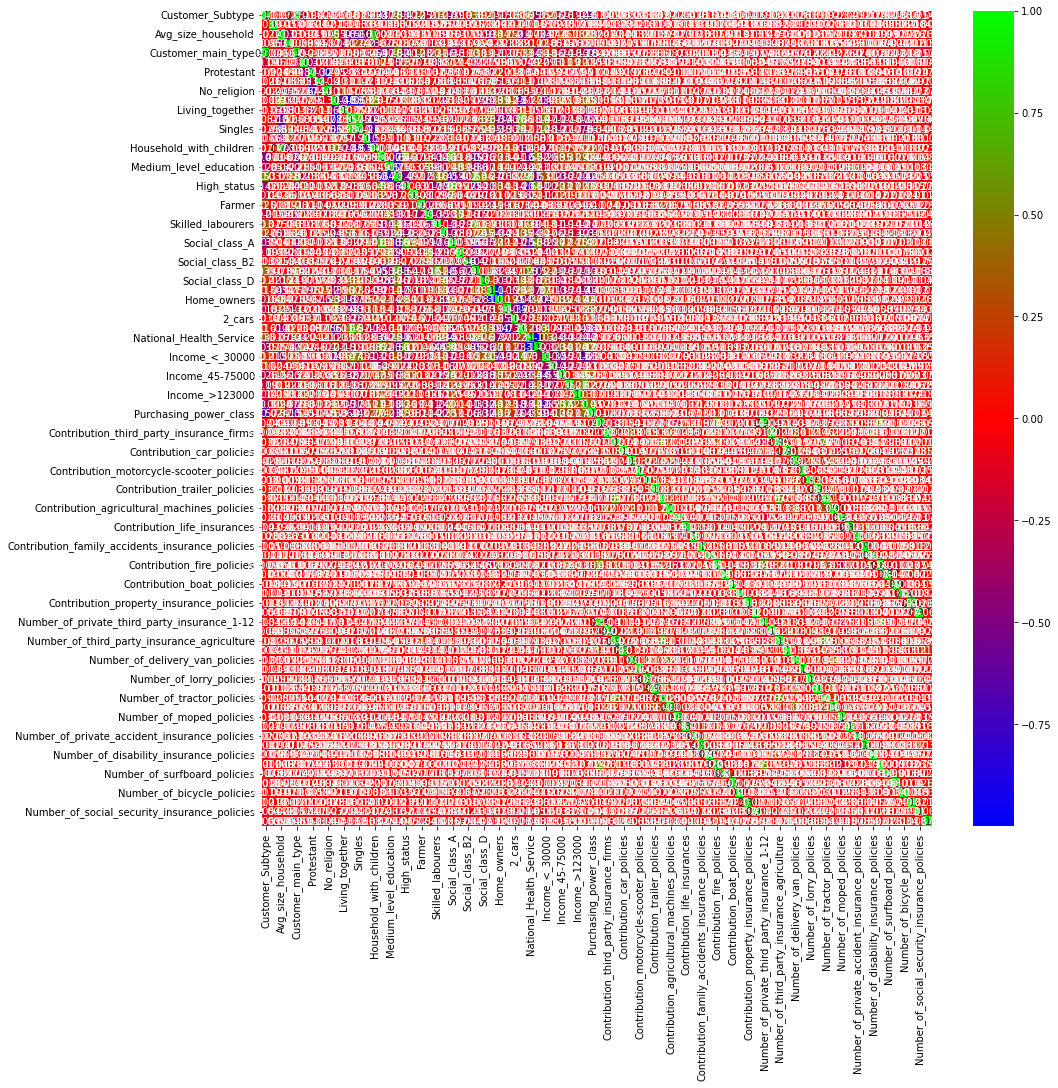

In [ ]:
correlated_features = corr_data.index
plt.figure(figsize=[15,15])
sns.heatmap(training[correlated_features].corr(), annot= True, cmap='brg')

In [ ]:
correlations = training.corrwith(training[target_column_name]).sort_values(ascending=False)
correlations.head(11)

Number_of_mobile_home_policies_0-1              1.000000
Contribution_car_policies                       0.150910
Number_of_car_policies                          0.144210
Number_of_boat_policies                         0.105700
Contribution_private_third_party_insurance      0.096463
Purchasing_power_class                          0.095938
Contribution_fire_policies                      0.094446
Contribution_boat_policies                      0.091361
Average_income                                  0.090185
Number_of_private_third_party_insurance_1-12    0.089387
High_level_education                            0.084635
dtype: float64

The above correlations are the top 10 positively correlated ones to the target variables.

The below correlations are the top 10 negatively correlated ones to the target variables.

In [ ]:
correlations = training.corrwith(training[target_column_name]).sort_values(ascending=True)
correlations.head(11)

Lower_level_education     -0.090561
Income_<_30000            -0.079765
Rented_house              -0.079143
No_car                    -0.076501
Customer_Subtype          -0.069385
Customer_main_type        -0.069300
Social_class_D            -0.063070
Other_relation            -0.062285
National_Health_Service   -0.058378
Unskilled_labourers       -0.054632
Farmer                    -0.054003
dtype: float64

According to the correlated data, ten features that i would like to select are lower_level_education, Average_income, Customer_Subtype , Customer_main_type, Contribution private third party insurance,purchasing_power_class, contribution_car_policies, Avg_age, Home_owners, Number of car policies

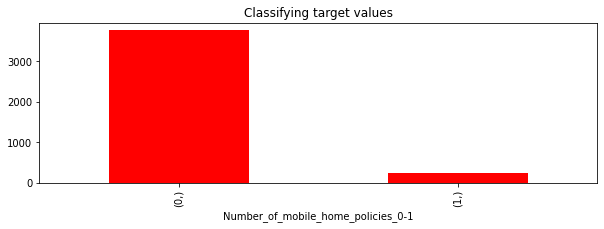

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
test_y.value_counts().plot(kind='bar', title='Classifying target values', color='red')

Text(0, 0.5, 'count')

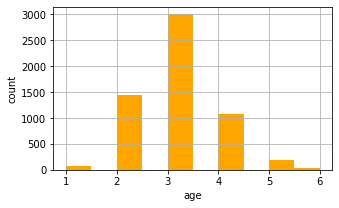

In [ ]:
training['Avg_age'].hist(figsize=(5,3), fc='orange', grid=True)
plt.xlabel('age')
plt.ylabel('count')

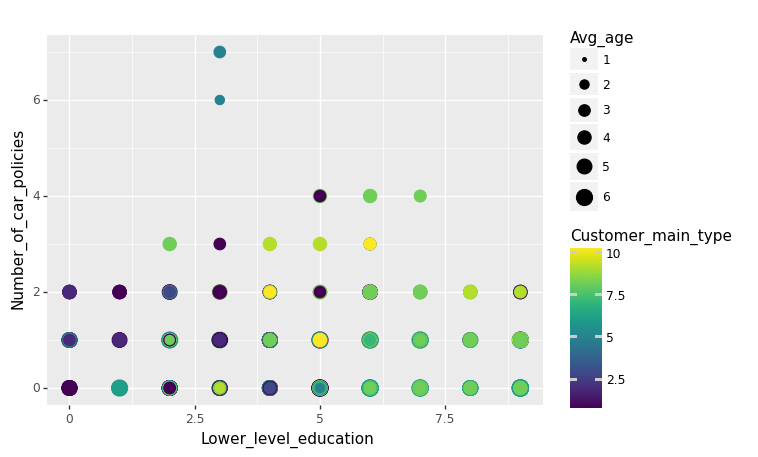

<ggplot: (8789321113177)>

In [ ]:
ggplot(training, aes(x='Lower_level_education', y='Number_of_car_policies', 
    size = 'Avg_age', color = 'Customer_main_type')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


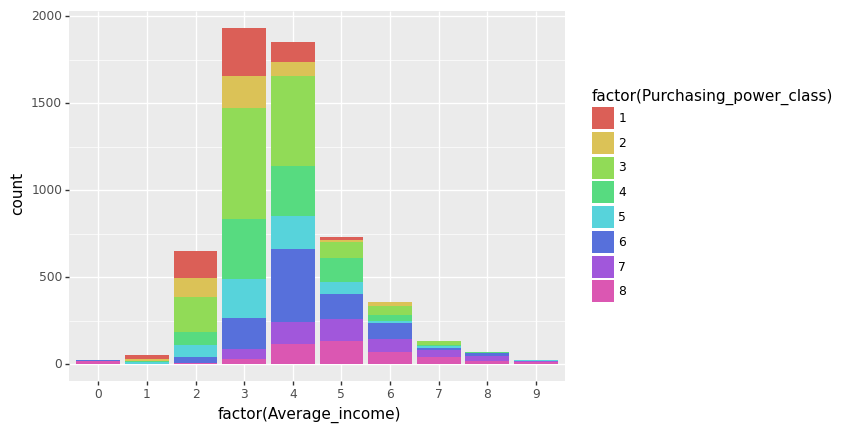

<ggplot: (8789314072889)>

In [ ]:
(
ggplot(training)
+ aes(x="factor(Average_income)", fill="factor(Purchasing_power_class)")
+ geom_bar()
)

Maximum number of purchases are medium to high purchasing power class

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


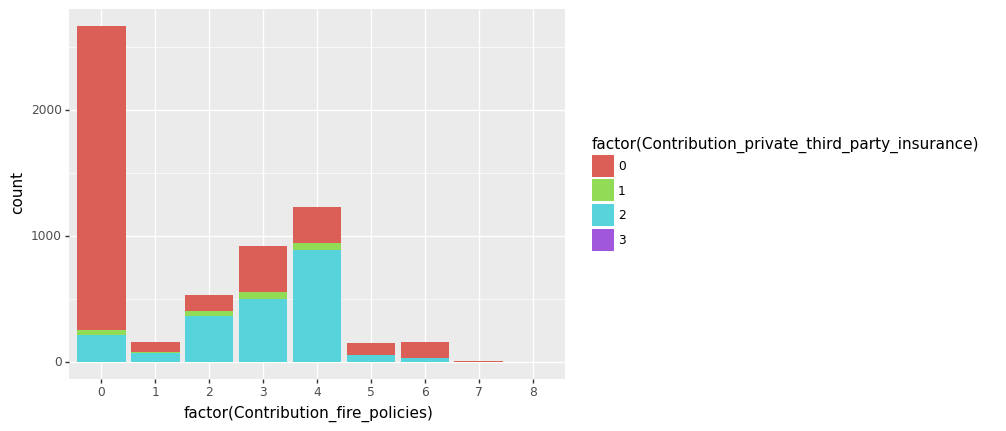

<ggplot: (8789314204697)>

In [ ]:
(
ggplot(training)
+ aes(x="factor(Contribution_fire_policies)", fill="factor(Contribution_private_third_party_insurance)")
+ geom_bar()
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


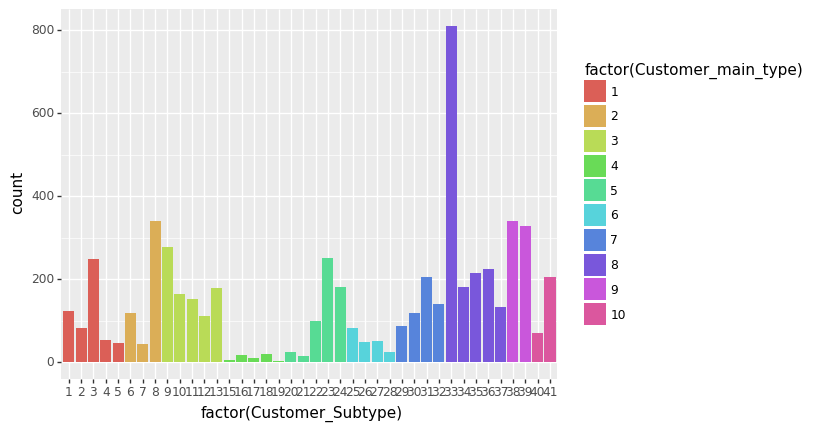

<ggplot: (8789314149173)>

In [ ]:
(
ggplot(training)
+ aes(x="factor(Customer_Subtype)", fill="factor(Customer_main_type)")
+ geom_bar()
)

1-5 cusomer subtypes comes under customer maintype category 1 <br>
6-8 cusomer subtypes comes under customer maintype category 2 <br>
and so on ....i.e customer main types strongly correlates with customer maintype

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


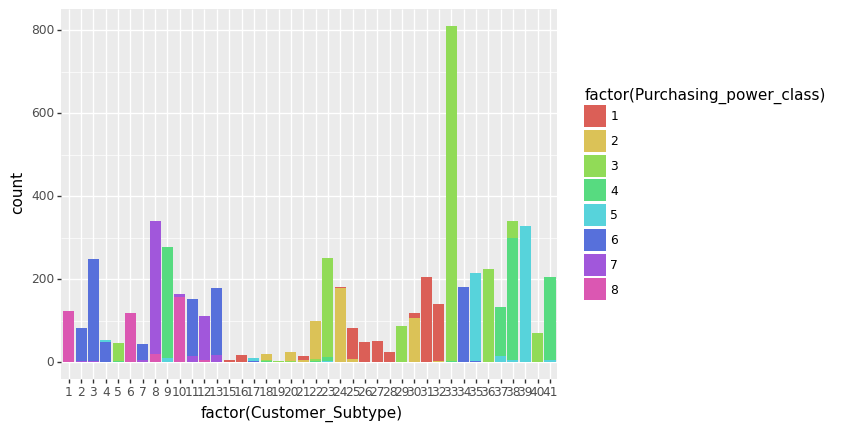

<ggplot: (8789314204753)>

In [ ]:
(
ggplot(training)
+ aes(x="factor(Customer_Subtype)", fill="factor(Purchasing_power_class)")
+ geom_bar()
)

Most type of purchases are from lower class large families i.e subtype 32 followed by subtypes 8 and 38- middle class and lower class large families.
Also some subtypes has 0 purchases



According to the visualization and statistical matrices, the above features prove to be relevant for the prediction task i.e.,

Lower_level_education, Average_income, Customer_Subtype , Customer_main_type, Contribution private third party insurance,purchasing_power_class, contribution_car_policies, Avg_age, Home_owners, Number of car policies

## 2. Train a Logistic Regression (LogReg) model with L1 regularization. Find the best model using grid search on C values. Analyze which features have nonzero coefficients for the best model. Are they in synch with your selected features from question 1?

In [ ]:
param_grid = {
    'C' : np.logspace(0,4,20)
}


logreg = LogisticRegression( 
          penalty="l1",
          solver="liblinear"
    )
clf = GridSearchCV(logreg, param_grid = param_grid, cv = 5, verbose=True)

best_clf = clf.fit(train_X, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
best_clf.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
best_clf.best_estimator_.coef_

array([[ 0.05720982, -0.15056607, -0.02232441,  0.19123512, -0.23877531,
        -0.0927187 ,  0.        ,  0.00273502, -0.04004091,  0.13563632,
         0.00799275,  0.06583498, -0.02186631, -0.05285858, -0.01494123,
         0.03977213, -0.05482631, -0.16367405,  0.06745776,  0.0443254 ,
        -0.12826722,  0.11841397,  0.02462761,  0.07693908,  0.02500123,
        -0.00397327,  0.01557145,  0.09302536, -0.00828847, -0.49790196,
        -0.46258362,  0.14052179,  0.11484652,  0.05874075, -0.34870966,
        -0.40349335,  0.0645189 ,  0.09098509,  0.06752199,  0.09666915,
        -0.17256076,  0.06789943,  0.06632174,  0.23531351, -0.11005617,
        -0.29966274,  0.22105185, -0.06098119, -0.01630799, -0.19003827,
         0.19921878,  0.08418508, -0.37584034, -0.10662607, -0.20123946,
        -0.04513466,  0.16341416,  0.24008671,  0.20972585,  0.        ,
         0.15104244,  0.22531234, -0.06340827,  0.11090475, -0.18994546,
         0.        ,  0.        ,  0.        ,  0. 

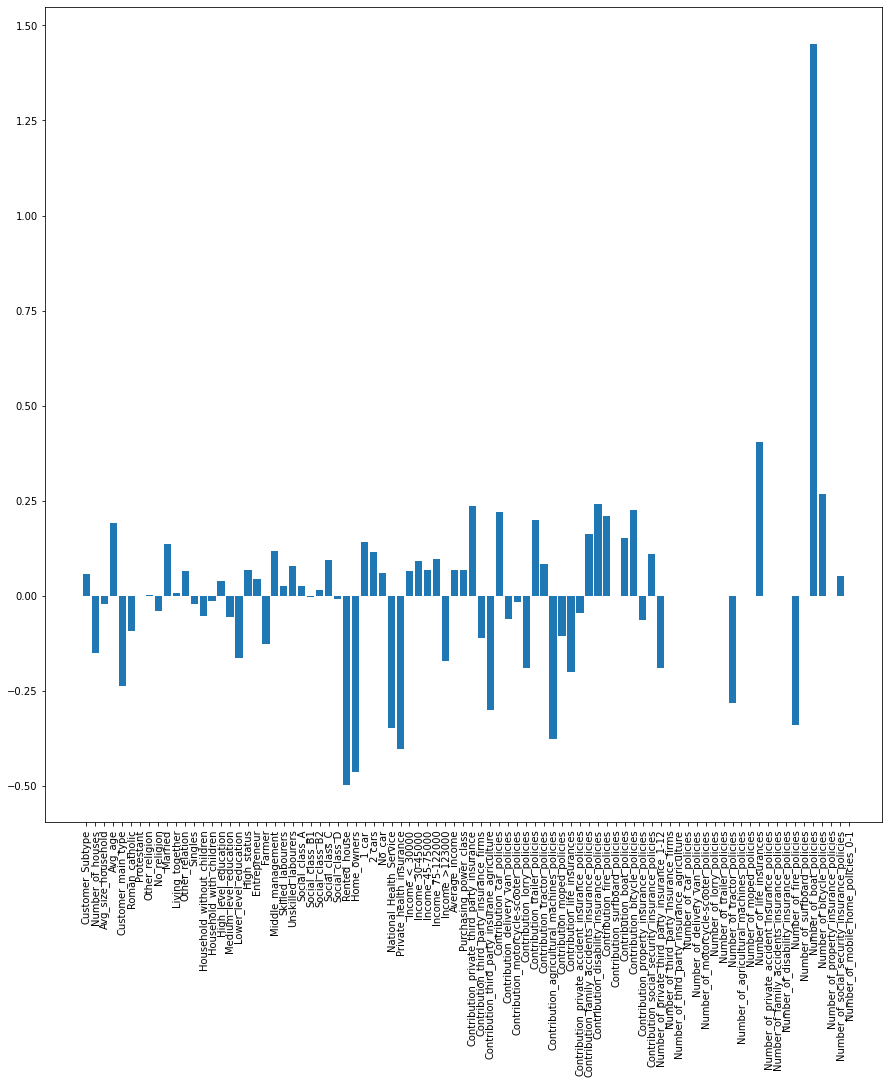

In [ ]:

plt.figure(figsize=[15,15])

plt.bar(column_names[0:85], best_clf.best_estimator_.coef_[0])
plt.xticks(range(len(column_names)), column_names, rotation='vertical')
plt.xlabel = "features"
plt.ylabel = "weights"

In [ ]:
best_clf.score(test_X, test_y)

0.9405

Observations-
Most of the features are in sync with the first question such as customer_subtype, customer_main_type, purchasing power class, Number of car_policies, Contribution private third party insurance , etc

## 3. Generate polynomial features and use LogReg again with L1. See if accuracy increase

In [ ]:
poly = PolynomialFeatures(interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(train_X)
X_poly.shape

logreg = LogisticRegression( penalty="l1", solver="liblinear")

logreg.fit(X_poly, train_y)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
print(poly.get_feature_names)
best_clf.best_estimator_

<bound method PolynomialFeatures.get_feature_names of PolynomialFeatures(include_bias=False)>


LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
test_X_poly = poly.fit_transform(test_X)
logreg.score(test_X_poly, test_y)

0.8995

Due to imbalanced data and high number of features the accuracy doesnt increase.<br> If some of the data for example, purchase power class column along with less impactful features are dropped. The accurcy might increase.<br>


## 4)Train a Decision Tree and see if you can get a better result. Show feature importance from the decision tree. Are they in synch with the features from Q1 and Q2? 

In [ ]:
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid, cv=10)
grid.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 7)})

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_X, train_y)

clf.score(test_X, test_y)

0.8935

In [ ]:
feat_importance = clf.tree_.compute_feature_importances(normalize=True)
feat_importance

array([0.05116581, 0.00017865, 0.01123465, 0.02074079, 0.00323715,
       0.008556  , 0.02449343, 0.01632141, 0.02225289, 0.01885305,
       0.00315506, 0.00550247, 0.00668436, 0.02380372, 0.01040476,
       0.01872104, 0.01209783, 0.02039027, 0.00694422, 0.02243581,
       0.01002675, 0.02108331, 0.0057105 , 0.01834255, 0.01135299,
       0.00572784, 0.01568495, 0.02220632, 0.00992767, 0.00264272,
       0.01644326, 0.01029301, 0.01647341, 0.00774277, 0.00664628,
       0.00586284, 0.01270804, 0.01644693, 0.01133048, 0.01944682,
       0.0016423 , 0.01824934, 0.01900049, 0.03883755, 0.00210412,
       0.        , 0.04119375, 0.00148806, 0.01173293, 0.        ,
       0.00596604, 0.00274192, 0.        , 0.01248406, 0.01618568,
       0.        , 0.00435469, 0.00205505, 0.07860433, 0.        ,
       0.00475942, 0.00743573, 0.00140328, 0.01122054, 0.02479792,
       0.00166741, 0.        , 0.03741056, 0.        , 0.0108347 ,
       0.        , 0.00275616, 0.00166741, 0.        , 0.00917

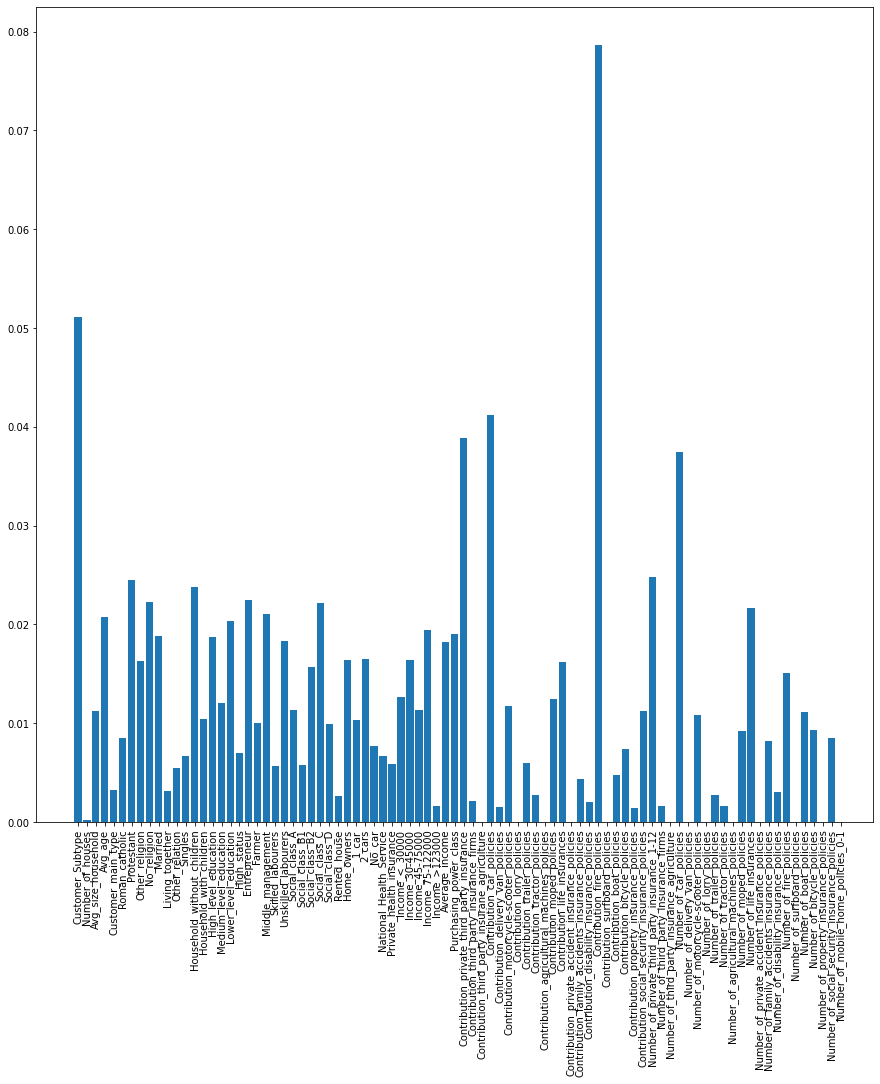

In [ ]:
plt.figure(figsize=[15,15])

plt.bar(column_names[0:85], feat_importance)
plt.xticks(range(len(column_names)), column_names, rotation='vertical')
plt.xlabel = "features"
plt.ylabel = "weights"

Observation-

The accuracy of the decision tree classifier doesnt increase. Its approximately same as that of the model's accuracy after generating polynomial features.<br>
Most of the features are in sync with the previous questions with highest feature importance given to contribution_of_fire_policies followed by customer_subtype, contribution_third_party_insurance, purchasing_power_class, whereas other features hold the medium importances here- customer_main_type, avg_age, average_income